# Project:-Loan Application Status Prediction


# Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area
Dependent Variable (Target Variable):

- Loan_Status

# Importing Libraries


In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score , accuracy_score , recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

In [199]:
#Getting the data
df = pd.read_csv("loan_prediction.csv")

In [200]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# data analysis

In [201]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [202]:
df.shape

(614, 13)

In [203]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [204]:
#checking null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

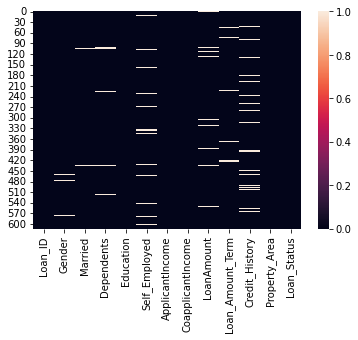

In [205]:
#checking null values using heatmap
sns.heatmap(df.isnull())

From the above heatamp we can see that null values are present in the given dataset.

In [206]:
#getting dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [207]:
#desciption of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


observations:-
    we can see that there is lots of difference between the percentile values.so we can say that skewness is present in give dataset.outliers are also present there.

In [208]:
df.shape

(614, 13)

# EDA

In [209]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

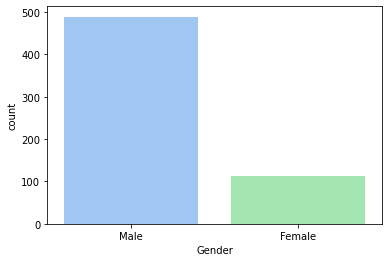

In [210]:
sns.countplot(df['Gender'])

we can see that there is more number of male is there.

<AxesSubplot:xlabel='Married', ylabel='count'>

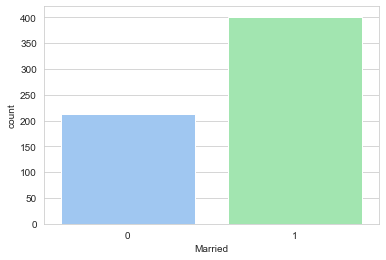

In [310]:
sns.countplot(df['Married'])

the number of married is more.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

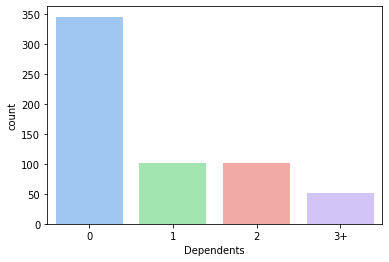

In [212]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

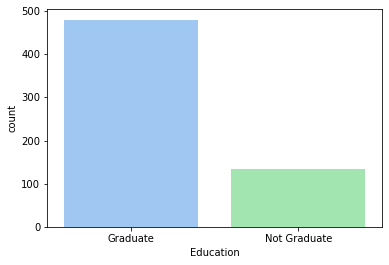

In [213]:
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

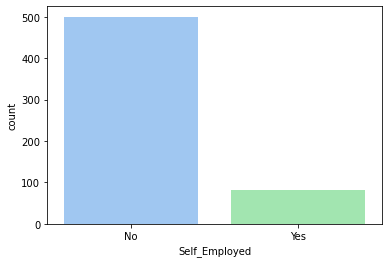

In [214]:
sns.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

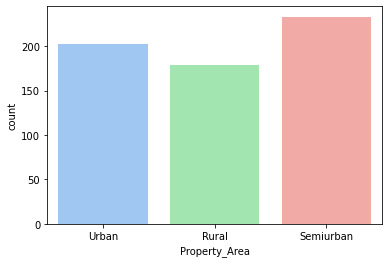

In [215]:
#Property_Area
sns.countplot(df['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

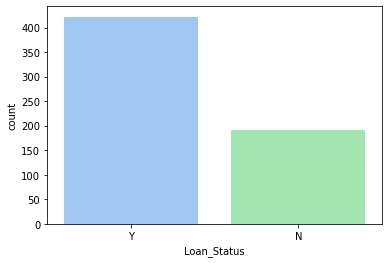

In [216]:
#Loan_Status
sns.countplot(df['Loan_Status'])


# numeric columns for visualization

In [217]:
#checking the numeric columns for visualization
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)   

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


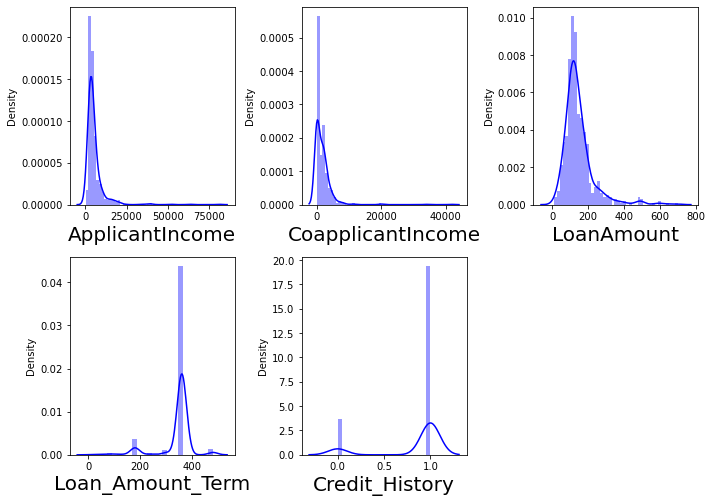

In [218]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="b")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

we can observe that skewness is present

In [219]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<AxesSubplot:>

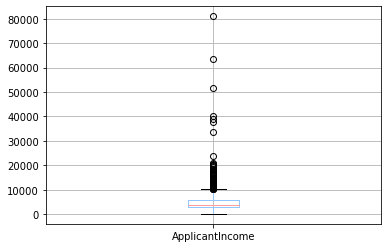

In [220]:
df.boxplot(column='ApplicantIncome')


<AxesSubplot:>

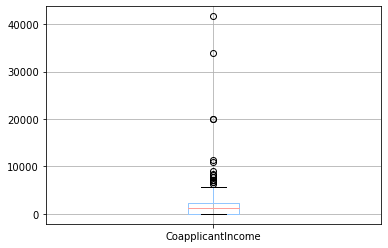

In [221]:
df.boxplot(column='CoapplicantIncome')

<AxesSubplot:>

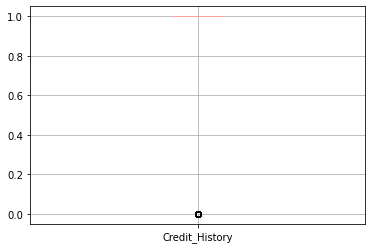

In [222]:
df.boxplot(column='Credit_History')

In [223]:
#check skewness
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [224]:
#checking correlation
df.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

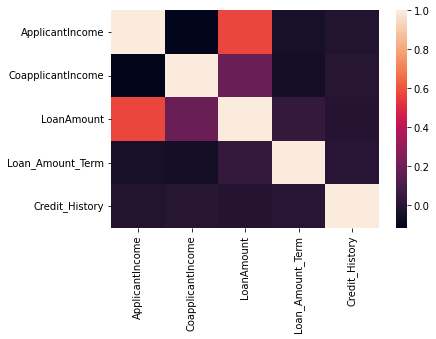

In [225]:
sns.heatmap(df.corr())

# filling missing values


In [226]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [227]:
#dealing with gender
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [228]:
# count of male is more so we will choose male to fill null values
df.Gender = df.Gender.fillna('Male')

In [229]:
#dealing with Married 
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [230]:
df.Married = df.Married.fillna('Yes')

In [231]:
#dealing with Dependents 
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [232]:
df.Dependents = df.Dependents.fillna('0')

In [233]:
#dealing with Self_Employed
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [234]:
df.Self_Employed = df.Self_Employed.fillna('No')

In [235]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())


In [236]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [237]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(360.0)


In [238]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [239]:
df.Credit_History = df.Credit_History.fillna(1.0)

In [240]:
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

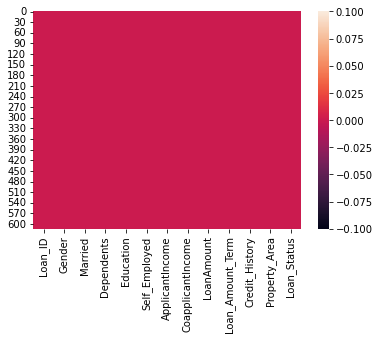

In [241]:
sns.heatmap(df.isnull())

observation;-From the haetmap we can clearly see that now there is now any null value in dataset.

# Dropping unnecessary column

In [242]:
#dropping column
df = df.drop('Loan_ID' , axis = 1)

# Label Encoding

In [243]:
cat_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [244]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [245]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

# ZScore

In [246]:
z_score = np.abs(zscore(df))

In [247]:
print(np.where(z_score>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [248]:
df_new = df.drop([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604])

In [249]:
df_new.shape

(577, 12)

In [250]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             577 non-null    int32  
 1   Married            577 non-null    int32  
 2   Dependents         577 non-null    int32  
 3   Education          577 non-null    int32  
 4   Self_Employed      577 non-null    int32  
 5   ApplicantIncome    577 non-null    int64  
 6   CoapplicantIncome  577 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   577 non-null    float64
 9   Credit_History     577 non-null    float64
 10  Property_Area      577 non-null    int32  
 11  Loan_Status        577 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 42.8 KB


# Skewness



In [251]:
x =df_new.drop('Loan_Status', axis = 1)


In [252]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [253]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

# transforming

In [255]:
powert = PowerTransformer( method = 'yeo-johnson' , standardize = False)
x_t = powert.fit_transform(x)

In [260]:
x_trans = pd.DataFrame(x_t , columns = x.columns)
x_trans

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,24.870137,0.000000,-0.000000,-0.000000,-0.000000,11.194697,0.000000,13.201111,1.681817e+07,80.55264,1.690589
1,24.870137,2.081131,0.438407,-0.000000,-0.000000,10.799279,9.832468,12.482026,1.681817e+07,80.55264,0.000000
2,24.870137,2.081131,-0.000000,-0.000000,0.087923,10.125222,0.000000,9.390267,1.681817e+07,80.55264,1.690589
3,24.870137,2.081131,-0.000000,0.166246,-0.000000,9.891003,10.631416,12.148447,1.681817e+07,80.55264,1.690589
4,24.870137,0.000000,-0.000000,-0.000000,-0.000000,11.236333,0.000000,12.996190,1.681817e+07,80.55264,1.690589
...,...,...,...,...,...,...,...,...,...,...,...
572,0.000000,0.000000,-0.000000,-0.000000,-0.000000,10.071991,0.000000,9.697075,1.681817e+07,80.55264,0.000000
573,24.870137,2.081131,0.599913,-0.000000,-0.000000,10.622891,0.000000,7.486669,2.101446e+06,80.55264,0.000000
574,24.870137,2.081131,0.438407,-0.000000,-0.000000,11.725354,6.825818,16.498185,1.681817e+07,80.55264,1.690589
575,24.870137,2.081131,0.551537,-0.000000,-0.000000,11.621649,0.000000,14.599374,1.681817e+07,80.55264,1.690589


# Standard Scaling



In [261]:
#Gaussian's distribution with zero mean and unit variance is standard scaling.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_s = scaler.fit_transform(x_trans)
x_s

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254, -1.34019905],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.13078824,
        -2.38941464,  0.01546372]])

In [262]:
x_sc = pd.DataFrame(x_s , columns = x_trans.columns)
x_sc

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.681780,-1.122446,0.316078,0.130788,0.418513,1.194806
1,0.477137,0.733939,0.902869,-0.541961,-0.380580,0.234783,0.744117,-0.015871,0.130788,0.418513,-1.340199
2,0.477137,0.733939,-0.809243,-0.541961,2.627567,-0.527201,-1.122446,-1.443112,0.130788,0.418513,1.194806
3,0.477137,0.733939,-0.809243,1.845150,-0.380580,-0.791972,0.895786,-0.169860,0.130788,0.418513,1.194806
4,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.728848,-1.122446,0.221481,0.130788,0.418513,1.194806
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.809243,-0.541961,-0.380580,-0.587375,-1.122446,-1.301481,0.130788,0.418513,-1.340199
573,0.477137,0.733939,1.533596,-0.541961,-0.380580,0.035386,-1.122446,-2.321865,-2.562700,0.418513,-1.340199
574,0.477137,0.733939,0.902869,-0.541961,-0.380580,1.281658,0.173344,1.838099,0.130788,0.418513,1.194806
575,0.477137,0.733939,1.344671,-0.541961,-0.380580,1.164426,-1.122446,0.961555,0.130788,0.418513,1.194806


<AxesSubplot:>

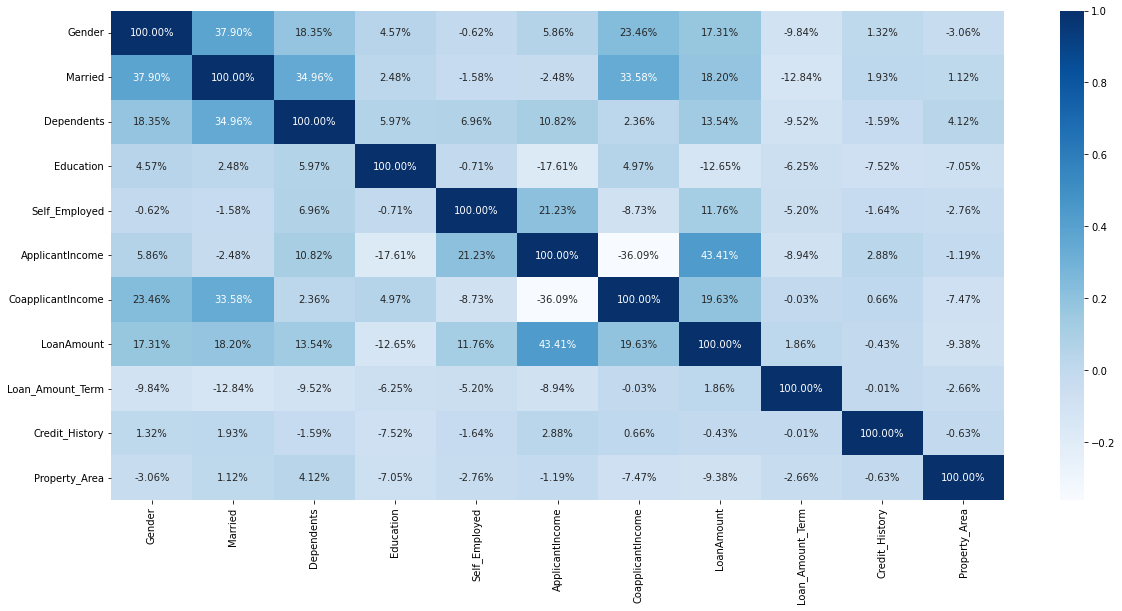

In [263]:
plt.figure(figsize= (20,9))
sns.heatmap(x_sc.corr() , cmap = 'Blues' , annot = True , fmt = '.2%')

# Target Variable



In [264]:
y = df_new.iloc[: , -1 :]

In [267]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


# Imbalanced learn


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

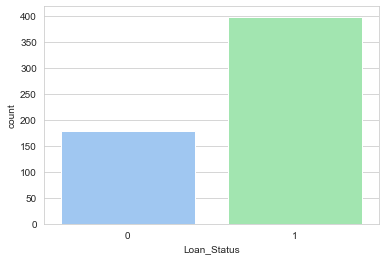

In [269]:
sns.set_style("whitegrid")
sns.countplot(x="Loan_Status", data=df_new)

We can see here Data is not fully balance but we'll treat the imbalace.



In [271]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x_sc, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (577, 1)
Resample Target dataset shape (796, 1)


In [273]:
from sklearn.model_selection import train_test_split

In [274]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [276]:
x_train.shape

(581, 11)

In [277]:
y_train.shape

(581, 1)

In [278]:
y_test.shape

(215, 1)

In [279]:
x_test.shape

(215, 11)

# MODEL BUILDING:


In [285]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.30,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)
    predrf=rf.predict(X_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)

Best accuracy is  0.8870292887029289 on random state  8


# Training on different Classifier models


In [286]:
models = [LogisticRegression(),
             KNeighborsClassifier(),
             SVC(),
             RandomForestClassifier(),
             AdaBoostClassifier(),
             DecisionTreeClassifier(),
             GaussianNB()
         ]

names = ['LogisticRegression','K Nearest Neighbor','Support Vector Classifier','Random Forest','AdaBoost Classifier',
         'Decision Tree Classifier' , 'GaussianNB' ]

for model,name in zip(models,names):
    fit = model.fit(X_train , y_train)
    y_predicted = model.predict(X_test)
    score = model.score(X_train , y_train)
    print(name ," - " ,score)
    print("Accuracy:",accuracy_score(y_predicted, y_test))
    print("Confusion Matrix:\n",confusion_matrix(y_predicted, y_test))
    print("\t\tclassification report")
    print("-" * 52)
    print(classification_report(y_predicted , y_test))

LogisticRegression  -  0.6876122082585279
Accuracy: 0.6401673640167364
Confusion Matrix:
 [[62 34]
 [52 91]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.65      0.59        96
           1       0.73      0.64      0.68       143

    accuracy                           0.64       239
   macro avg       0.64      0.64      0.63       239
weighted avg       0.65      0.64      0.64       239

K Nearest Neighbor  -  0.8348294434470377
Accuracy: 0.7740585774058577
Confusion Matrix:
 [[100  40]
 [ 14  85]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       140
           1       0.68      0.86      0.76        99

    accuracy                           0.77       239
   macro avg       0.78      0.79      0.77       239
weighted avg       0.80  

From above we can observe that SVC and k nearest t has the best score and accuracy scores. So we will use only these models for our further predictions.



# Support Vector Classifier (SVC)



In [288]:
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=i)
    sv = SVC()
    sv.fit(X_train,y_train)
    predsv = sv.predict(X_test)
    acc=accuracy_score(y_test,predsv)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)
    

Best accuracy is  0.8908045977011494 on random state  12


In [289]:
X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=12)
sv = SVC()
sv.fit(X_train , y_train)
sv_predicted = sv.predict(X_test)
score = sv.score(X_train , y_train)

print(SVC() ," - " ,score)
print("Accuracy:",accuracy_score(sv_predicted, y_test))
print("Confusion Matrix:\n",confusion_matrix(sv_predicted, y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(sv_predicted , y_test))

SVC()  -  0.8138957816377171
Accuracy: 0.8908045977011494
Confusion Matrix:
 [[ 24   1]
 [ 18 131]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.96      0.72        25
           1       0.99      0.88      0.93       149

    accuracy                           0.89       174
   macro avg       0.78      0.92      0.82       174
weighted avg       0.93      0.89      0.90       174



# KNeighborsClassifier

In [292]:
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
    predknn = knn.predict(X_test)
    acc=accuracy_score(y_test,predknn)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)
    

Best accuracy is  0.8448275862068966 on random state  39


In [293]:
X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=39)
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)
knn_predicted = knn.predict(X_test)
score = knn.score(X_train , y_train)

print(KNeighborsClassifier() ," - " ,score)
print("Accuracy:",accuracy_score(knn_predicted, y_test))
print("Confusion Matrix:\n",confusion_matrix(knn_predicted, y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(knn_predicted , y_test))

KNeighborsClassifier()  -  0.794044665012407
Accuracy: 0.8448275862068966
Confusion Matrix:
 [[ 30   7]
 [ 20 117]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.81      0.69        37
           1       0.94      0.85      0.90       137

    accuracy                           0.84       174
   macro avg       0.77      0.83      0.79       174
weighted avg       0.87      0.84      0.85       174



# Random Forest Classsifier



In [294]:
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train,y_train)
    predrf = rf.predict(X_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)
    

Best accuracy is  0.8563218390804598 on random state  39


In [295]:
X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=39)
rf = RandomForestClassifier()
rf.fit(X_train , y_train)
rf_predicted = rf.predict(X_test)
score = rf.score(X_train , y_train)

print(RandomForestClassifier() ," - " ,score)
print("Accuracy:",accuracy_score(rf_predicted, y_test))
print("Confusion Matrix:\n",confusion_matrix(rf_predicted, y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(rf_predicted , y_test))

RandomForestClassifier()  -  1.0
Accuracy: 0.8563218390804598
Confusion Matrix:
 [[ 30   5]
 [ 20 119]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.86      0.71        35
           1       0.96      0.86      0.90       139

    accuracy                           0.86       174
   macro avg       0.78      0.86      0.81       174
weighted avg       0.89      0.86      0.86       174



# Confusion Matrix



In [298]:
predictions = cross_val_predict(rf, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[ 56,  73],
       [ 26, 248]], dtype=int64)

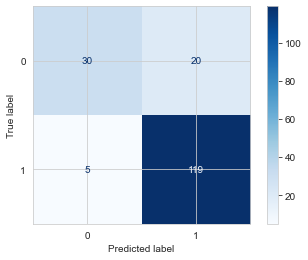

In [299]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf ,X_test , y_test , cmap = 'Blues' )

>1, train: 0.734, test: 0.776
>2, train: 0.794, test: 0.879
>3, train: 0.792, test: 0.879
>4, train: 0.794, test: 0.885
>5, train: 0.811, test: 0.879
>6, train: 0.839, test: 0.879
>7, train: 0.876, test: 0.868
>8, train: 0.893, test: 0.885
>9, train: 0.928, test: 0.874
>10, train: 0.958, test: 0.868
>11, train: 0.975, test: 0.868
>12, train: 0.988, test: 0.856
>13, train: 0.998, test: 0.862
>14, train: 0.998, test: 0.851
>15, train: 1.000, test: 0.868
>16, train: 1.000, test: 0.879
>17, train: 1.000, test: 0.874
>18, train: 1.000, test: 0.856
>19, train: 1.000, test: 0.874
>20, train: 1.000, test: 0.851


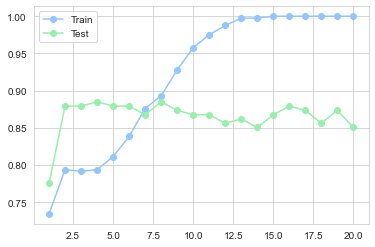

In [301]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:

    model = RandomForestClassifier(max_depth=i)
    
    model.fit(X_train, y_train)
   
    train_y_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train,train_y_pred)
    train_scores.append(train_accuracy)
   
    test_y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_accuracy)
    #printing test and accuracy scores.
    print('>%d, train: %.3f, test: %.3f' % (i, train_accuracy, test_accuracy))

plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

# Getting the probabilities



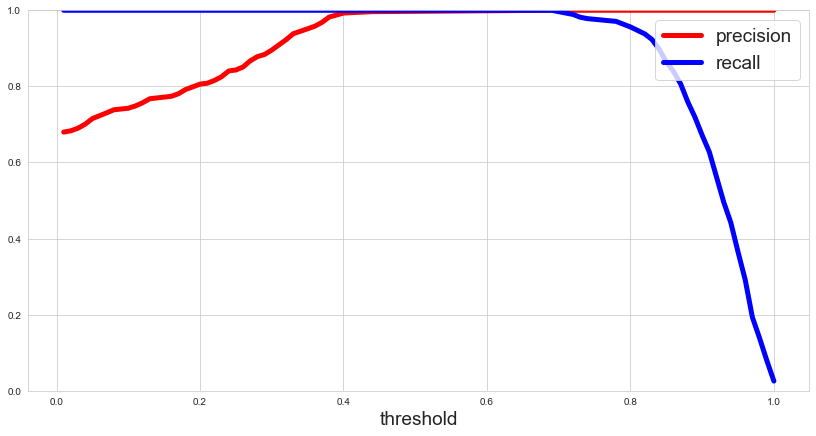

In [306]:
y_scores = rf.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

# ROC_AUC Curve



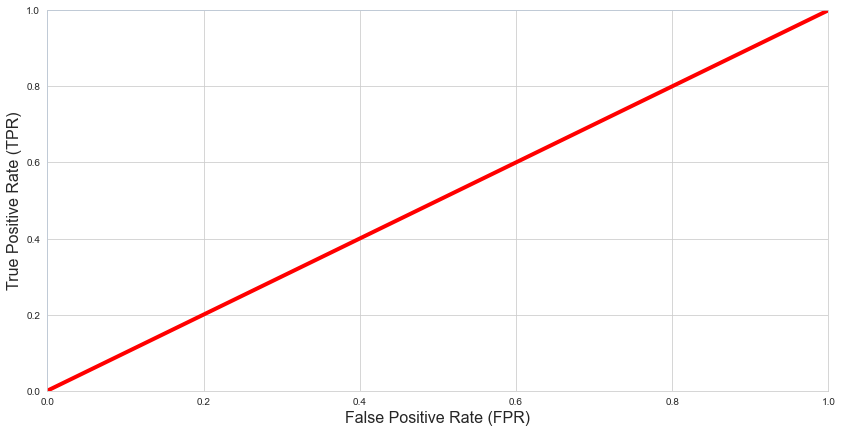

In [308]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()



# saving model

In [309]:
import joblib
joblib.dump(rf , 'RandomForestClassifier')
['RandomForestClassifier']

['RandomForestClassifier']